# Algoritmus minimalizace EMM

Tento nb slouží k usnadnění procesu minimalizace EMM. 

In [1]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

## osa $z$

In [22]:
import numpy as np

####################### vstup

# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
fotkor = np.genfromtxt("axial_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,3:5]

# napeti ve formatu: array() radky odpovidaji jednotlivym histogramum, radek: [U_+, U_-, U_komp_x, U_komp_y], \nu = U_+ - U_- / soucet
# [cislo histogramy, [U_+, U_-, U_komp_x, U_komp_y]]
voltages = np.genfromtxt("axial_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")[3:5,:]


# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 150 # doba nacitani dat v s
background_photocounts = 400 # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# hist sigmas
hist_sigma = [200, 200]


#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=True)

In [23]:
print(DeltaS_S_ratio)
print(Delta_S_S_ratio_sigma)
print(fot_phi)
print(fot_phi_sigma)

[0.13033058 0.09410585]
[0.0036095455378133967, 0.0037264395106371513]
[-1.9612262157871394, -1.9493386183685601]
[0.027424142877554264, 0.03971786245249423]


In [24]:
from EMM_min_func import get_DeltaS_S_nu_fit

U_5, U_6, min_interv, linfit, nu_fit, DeltaS_S_fit_nu = get_DeltaS_S_nu_fit(DeltaS_S_ratio, nu, iter_coef=0.1)

nu_MM_zero = np.mean(min_interv)

print("prvni bod:")
print([U_5[0], U_6[0]])

print("druhy bod:")
print([U_5[1], U_6[1]])

prvni bod:
[578.1271797218535, 421.8728202781466]
druhy bod:
[589.199467039498, 410.800532960502]


Plot pro lepsi visualni orientaci

(0, 0.14060438563896124)

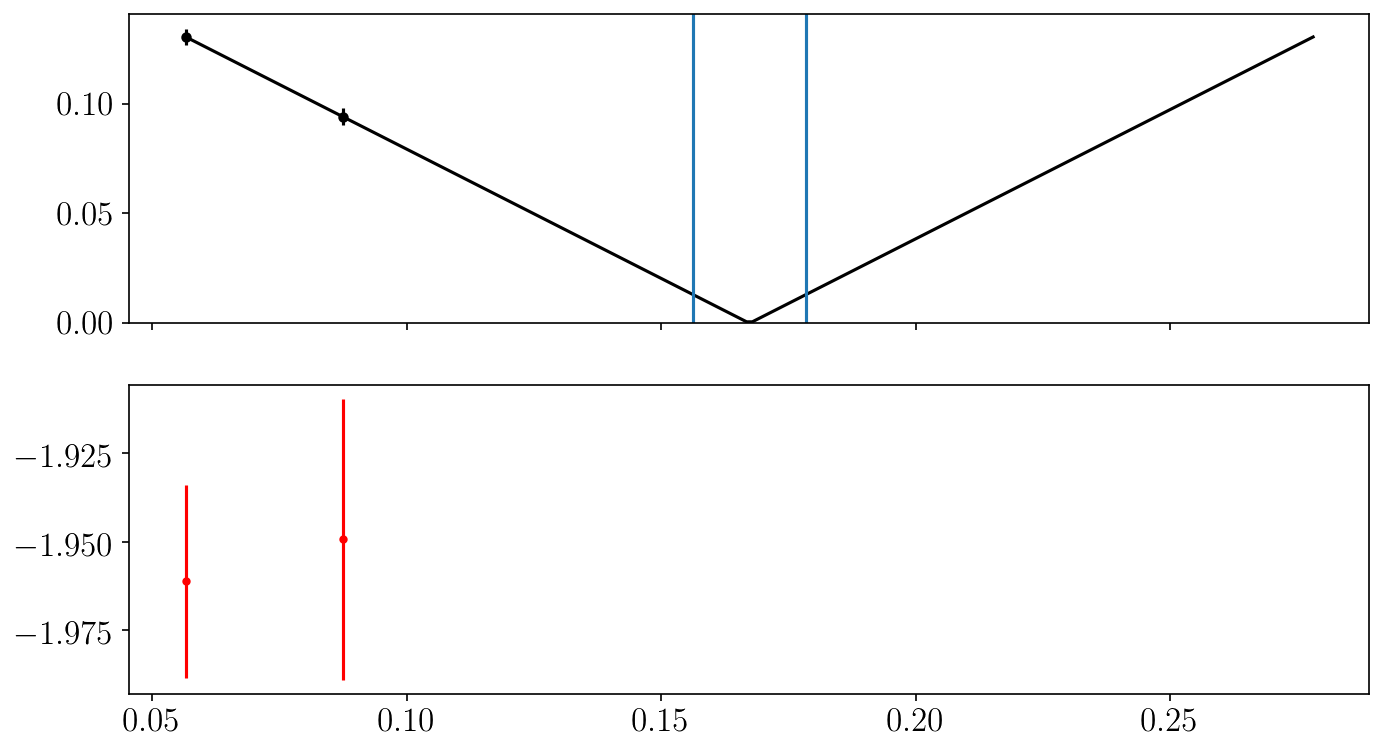

In [25]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(nu, np.abs(DeltaS_S_ratio),
         fmt = '.', color='black', markersize=8, yerr= Delta_S_S_ratio_sigma)
ax1.plot(nu_fit, np.abs(DeltaS_S_fit_nu), label=r'1. krok ' + r'$\nu_{{\rm min}} \approx {:.4f}$'.format(nu_MM_zero), color='black')

ax2.errorbar(nu, fot_phi, fmt='.', color='red', yerr=fot_phi_sigma)

# body v pristim kroku
ax1.axvline(min_interv[0])
ax1.axvline(min_interv[1])

# limity -- scale
ax1.set_ylim(bottom=0)

## osa $xz$

musim zadat zjistene minimum v ose $z$

In [27]:
# DeltaS_S_min_z = np.abs( min(DeltaS_S_ratio) )
# fot_phi_min_z = fot_phi[ np.argmin(DeltaS_S_ratio) ]

DeltaS_S_min_z = 0.3
fot_phi_min_z = -1.9

print(DeltaS_S_min_z)
print(fot_phi_min_z)

0.3
-1.9


In [28]:
### import 

fotkor = np.genfromtxt("sikmy_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,5:7]
voltages = np.genfromtxt("sikmy_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")[5:7,:]

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 100 # doba nacitani dat v s
background_photocounts = 1000 # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# hist sigmas
hist_sigma = [100, 200]


#----------- fit
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma,
                                                                                                       sign_DeltaS=True)

In [29]:
print( DeltaS_S_ratio )
print( fot_phi )
print(DeltaS_S_min_z)
print(fot_phi_min_z)

[0.01069009 0.04905091]
[1.3412341326512243, 1.2137661526750305]
0.3
-1.9


In [30]:
from EMM_min_func import get_DeltaS_S_xz_fit

U_komp_x = voltages[:,2]
gamma = 45/180 * np.pi

U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit(DeltaS_S_ratio, 
                                                                                                                     fot_phi, U_komp_x, 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma)
U_komp_x_res = np.mean(U_komp_x_interval)

print(U_komp_x_interval)

[46.35643971527207, 49.260732858786774]


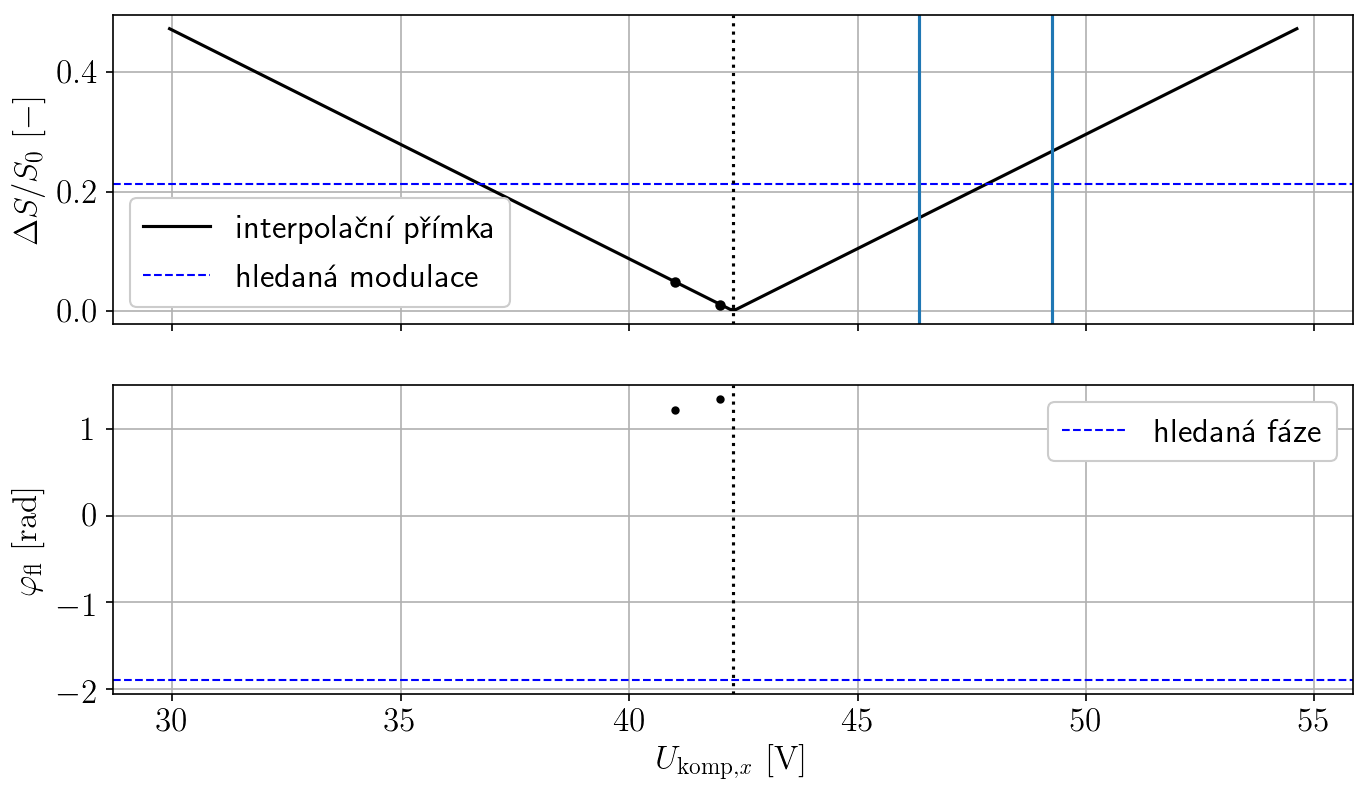

In [31]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.plot(U_komp_x, np.abs(DeltaS_S_ratio),
         '.', color='black', markersize=8)
ax1.plot(U_komp_x_fit, np.abs(DeltaS_S_fit), color='black', label=r'interpolační přímka')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.plot(U_komp_x, fot_phi, '.', color='black')
# ax2.plot(nu_bezcond[9], fot_phi[9], 'o')
# body v pristim kroku
# ax1.axvline(min_interv[0])
# ax1.axvline(min_interv[1])

# kde bychom meli hledat:
ax1.axhline(DeltaS_S_ratio_xz_teor, label=r'hledaná modulace', linewidth=1, linestyle='--', color='blue')
ax2.axhline(fot_phi_xz_teor, label=r'hledaná fáze',linewidth=1, linestyle='--',color='blue')

# nalezene reseni + interval pro pristi iteraci
# ax1.plot(U_komp_x_res, np.abs(MM_line(linfit, U_komp_x_res)), 'x', 
#          markersize=10, label=r'$U_{{\rm komp, \it x}} \approx {:.1f} \, \rm V$'.format(U_komp_x_res), color='red')
ax1.axvline(U_komp_x_interval[0])
ax1.axvline(U_komp_x_interval[1])

# vertikalni line u fazi
ax2.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
ax1.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
# popisky

ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax2.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

ax1.legend(framealpha=1)
ax2.legend(framealpha=1)
ax1.grid()
ax2.grid()

## rovina $xy$

In [38]:
# DeltaS_S_min_xz = np.abs( min(DeltaS_S_ratio) )
# fot_phi_min_xz = fot_phi[ np.argmin(DeltaS_S_ratio) ]
DeltaS_S_min_z = 0.4
fot_phi_min_z = 3.62

DeltaS_S_min_xz = 0.418
fot_phi_min_xz = 4.25

print(DeltaS_S_min_xz)
print(fot_phi_min_xz)

0.418
4.25


In [39]:
### import 

fotkor = np.genfromtxt("sikmy_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,2:4]
voltages = np.genfromtxt("sikmy_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")[2:4,:]

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 100 # doba nacitani dat v s
background_photocounts = 1000 # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# hist sigmas
hist_sigma = [100, 200]


#----------- fit
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma,
                                                                                                       sign_DeltaS=True)

In [40]:
print( DeltaS_S_ratio )
print( fot_phi )

[0.2853725 0.0786699]
[-2.0311404159368553, -1.9996641987069053]


In [47]:
from EMM_min_func import get_DeltaS_S_xy_fit

# U_komp_y = voltages[:,2]
U_komp_y = np.array( [49., 44.] )
gamma = 45/180 * np.pi
epsilon = 20/180 * np.pi

U_komp_y_interval, linfit, U_komp_y_fit, DeltaS_S_fit, DeltaS_S_ratio_xy_teor, fot_phi_xy_teor = get_DeltaS_S_xy_fit(DeltaS_S_ratio, 
                                                                                                                     fot_phi, U_komp_y, 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     DeltaS_S_min_xz, 
                                                                                                                     fot_phi_min_z, fot_phi_min_xz,
                                                                                                                     gamma, epsilon)
U_komp_y_res = np.mean(U_komp_y_interval)

print(DeltaS_S_ratio_xy_teor)
print(fot_phi_xy_teor)
print(U_komp_y_interval)

0.12203999284983488
-1.311784460808573
[44.78682047354308, 45.311367455905135]


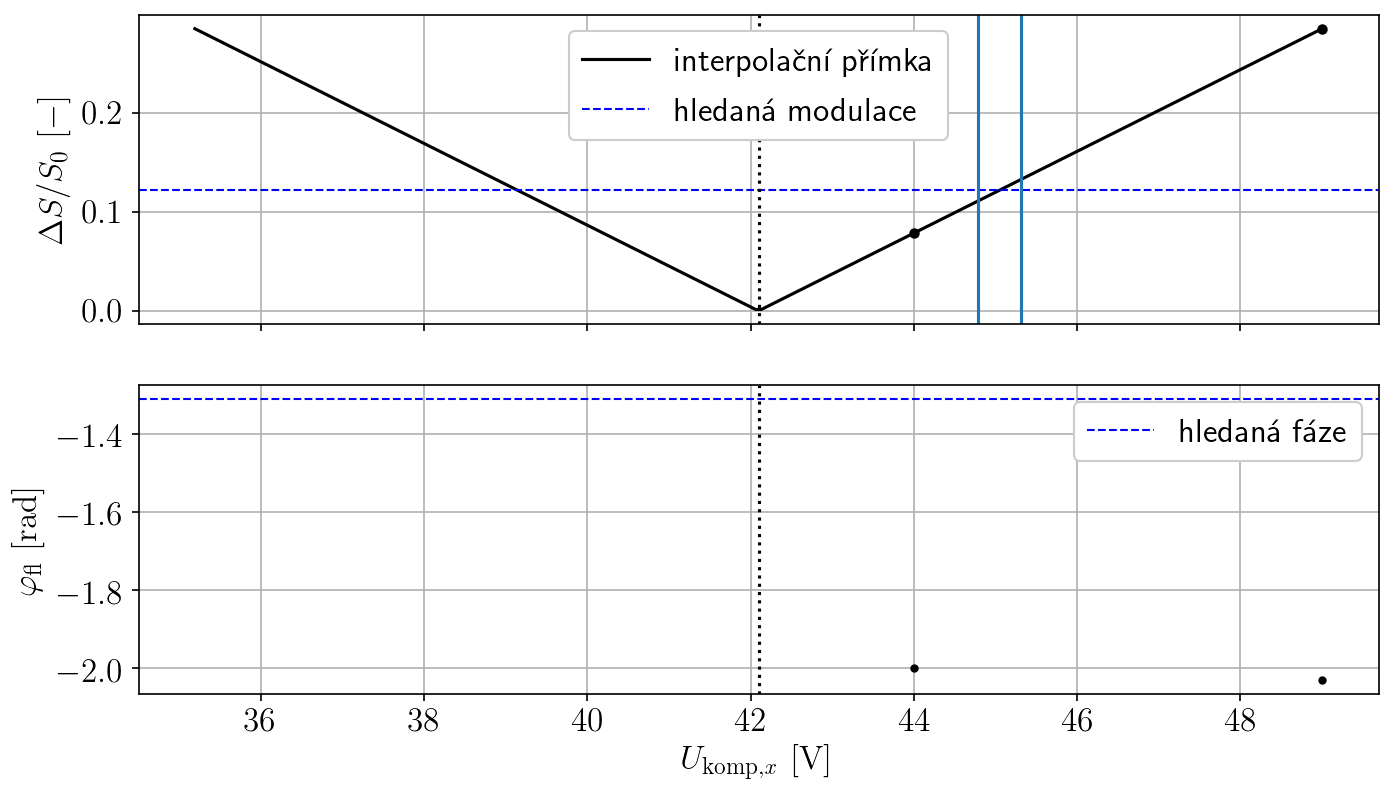

In [48]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.plot(U_komp_y, np.abs(DeltaS_S_ratio),
         '.', color='black', markersize=8)
ax1.plot(U_komp_y_fit, np.abs(DeltaS_S_fit), color='black', label=r'interpolační přímka')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.plot(U_komp_y, fot_phi, '.', color='black')
# ax2.plot(nu_bezcond[9], fot_phi[9], 'o')
# body v pristim kroku
# ax1.axvline(min_interv[0])
# ax1.axvline(min_interv[1])

# kde bychom meli hledat:
ax1.axhline(DeltaS_S_ratio_xy_teor, label=r'hledaná modulace', linewidth=1, linestyle='--', color='blue')
ax2.axhline(fot_phi_xy_teor, label=r'hledaná fáze',linewidth=1, linestyle='--',color='blue')

# nalezene reseni + interval pro pristi iteraci
# ax1.plot(U_komp_x_res, np.abs(MM_line(linfit, U_komp_x_res)), 'x', 
#          markersize=10, label=r'$U_{{\rm komp, \it x}} \approx {:.1f} \, \rm V$'.format(U_komp_x_res), color='red')
ax1.axvline(U_komp_y_interval[0])
ax1.axvline(U_komp_y_interval[1])

# vertikalni line u fazi
ax2.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
ax1.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
# popisky

ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax2.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

ax1.legend(framealpha=1)
ax2.legend(framealpha=1)
ax1.grid()
ax2.grid()

## zobrazeni mikropohybu

In [50]:
DeltaS_S_min_xy = 0.12203999284983488
fot_phi_min_xy = -1.311784460808573

In [60]:
from EMM_min_func import get_beta_xyz_phi_xyz

DeltaS_phi_xyz_aux = get_beta_xyz_phi_xyz([DeltaS_S_min_z, DeltaS_S_min_xz, DeltaS_S_min_xy, fot_phi_min_z, fot_phi_min_xz, fot_phi_min_xy,
                     gamma, epsilon])
DeltaS_xyz = np.array( DeltaS_phi_xyz_aux[0] )
DeltaS_xyz = np.append(DeltaS_xyz, DeltaS_S_min_z)

fot_phi_xyz = np.array( DeltaS_phi_xyz_aux[1] )
fot_phi_xyz = np.append(fot_phi_xyz, fot_phi_min_z)
